By [Yulandy Chiu](https://www.youtube.com/@YulandySpace)

Aided with Gemini/Claude/ChatGPT and modified by Yulandy Chiu

Version: 2024/05/17

Videos:
* [[10分鐘搞懂機器學習] 1.6 屬性組合 Attribute combinations](https://youtu.be/7295G0HZA-A?si=C0wRY4xyJeyju4tA)

Facebook: [Yulandy Chiu的AI資訊站](https://www.facebook.com/yulandychiu)

 This code is licensed under the Creative Commons Attribution-NonCommercial 4.0
 International License (CC BY-NC 4.0). You are free to use, modify, and share this code for non-commercial purposes, provided you give appropriate credit. For more details, see the LICENSE file or visit: https://creativecommons.org/licenses/by-nc/4.0/
 © [2024] [Yulandy Chiu](https://www.youtube.com/@YulandySpace)


2.使用多項式特徵 (polynomial features)

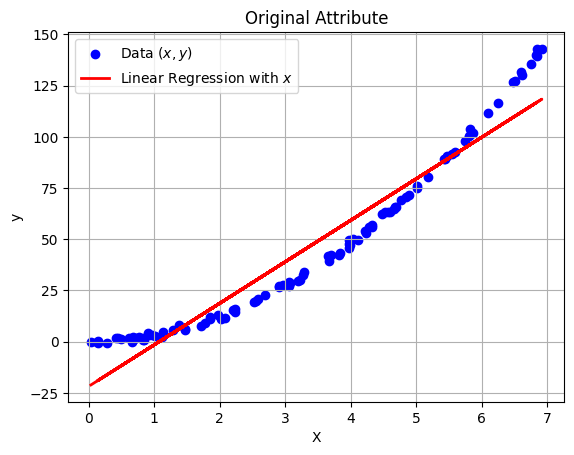

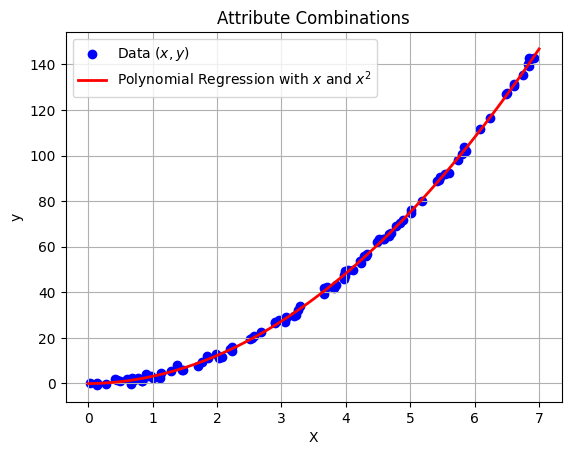

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 產生一個虛擬數據集
np.random.seed(0)
x_range=7
X = x_range * np.random.rand(100, 1)
y = 3 * X**2 -0.002*X + np.random.randn(100, 1)

# 使用線性回歸模型擬合數據
model = LinearRegression()
model.fit(X, y) # 找適合的模型來擬合資料

# 繪製數據點
plt.scatter(X, y, color='blue', label='Data $(x,y)$')

# 繪製擬合的線性回歸線
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Linear Regression with $x$')

plt.title('Original Attribute')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


# 使用多項式特徵將X轉換為X^2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# 使用線性回歸模型擬合數據
model.fit(X_poly, y)

# 準備數據以繪製圖形
X_new = np.linspace(0, x_range, 100).reshape(-1, 1)  # 生成用於繪圖的新數據
X_new_poly = poly_features.transform(X_new)  # 將新數據轉換為多項式特徵
y_new = model.predict(X_new_poly)  # 預測新數據的y值

# 繪製數據點
plt.scatter(X, y, color='blue', label='Data $(x,y)$')

# 繪製擬合的線性回歸線
plt.plot(X_new, y_new, color='red', linewidth=2, label='Polynomial Regression with $x$ and $x^2$')

plt.title('Attribute Combinations')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()





3. 使用相似度特徵 (similarity features)

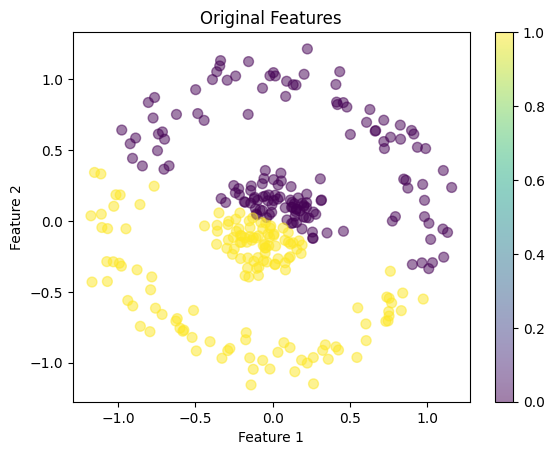

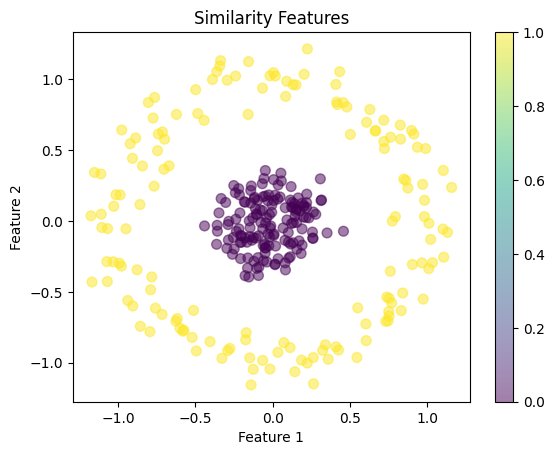

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 生成虛擬數據集
X, _ = make_circles(n_samples=300, noise=0.1, factor=0.2, random_state=0)

# 定義繪製散點圖的函數
def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    plt.show()

# 使用原始特徵進行聚類
kmeans_orig = KMeans(n_clusters=2, random_state=0, n_init='auto')
labels_orig = kmeans_orig.fit_predict(X)
plot_clusters(X, labels_orig, title='Original Features')

# 計算原始特徵的 Silhouette Score
# silhouette_orig = silhouette_score(X, labels_orig)
# print(f"Original Features Silhouette Score: {silhouette_orig}")

# 計算相似度特徵
X_squared = np.sum(X**2, axis=1, keepdims=True)
X_squared_dist = X_squared + X_squared.T - 2 * np.dot(X, X.T)
X_sim = np.exp(-X_squared_dist / X_squared_dist.std())

# 使用相似度特徵進行聚類
kmeans_sim = KMeans(n_clusters=2, random_state=0, n_init='auto')
labels_sim = kmeans_sim.fit_predict(X_sim)
plot_clusters(X, labels_sim, title='Similarity Features')

# 計算相似度特徵的 Silhouette Score
# silhouette_sim = silhouette_score(X, labels_sim)
# print(f"Similarity Features Silhouette Score: {silhouette_sim}")
